In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
# Load the two CSV files into DataFrames
rental_inventory_df = pd.read_csv('../Data File Repository/Rental_Inventory_DF.csv')
yearly_median_rent_df = pd.read_csv('../Data File Repository/Yearly_Median_Rent_DF.csv')


In [3]:
# Rename columns in rental_inventory_df
rental_inventory_columns = {'Borough': 'Borough'}
rental_inventory_columns.update({
    str(year): f"{year} Total Rentals" for year in range(2010, 2024)
})
rental_inventory_df.rename(columns=rental_inventory_columns, inplace=True)


In [4]:
# Rename columns in yearly_median_rent_df
yearly_median_rent_columns = {'Borough': 'Borough'}
yearly_median_rent_columns.update({
    str(year): f"{year} Median Rent" for year in range(2010, 2024)
})
yearly_median_rent_df.rename(columns=yearly_median_rent_columns, inplace=True)


In [5]:
# Combine the two DataFrames into a single DataFrame on 'Borough'
combined_df = pd.merge(rental_inventory_df, yearly_median_rent_df, on='Borough')


In [6]:
# Define new column order
new_order = ['Borough']
for year in range(2010, 2024):
    new_order.extend([f"{year} Total Rentals", f"{year} Median Rent"])


In [7]:
# Reorder columns based on the new order
combined_df = combined_df[new_order]

In [8]:
# Print the resulting DataFrame for debugging purposes
print("combined_df:\n", combined_df.head())

combined_df:
          Borough  2010 Total Rentals 2010 Median Rent  2011 Total Rentals  \
0          Bronx                3087         $1425.00                3674   
1       Brooklyn               59006         $2033.50               65757   
2      Manhattan              441207         $2847.50              395231   
3         Queens               19596         $1538.25               18369   
4  Staten Island                  55             $nan                  57   

  2011 Median Rent  2012 Total Rentals 2012 Median Rent  2013 Total Rentals  \
0         $1210.75                5419         $1425.00                5462   
1         $1743.75               83105         $1900.00              136910   
2         $3157.00              456434         $3275.00              576566   
3         $1550.00               30753         $1825.00               40171   
4             $nan                 139         $1400.00                 331   

  2013 Median Rent  2014 Total Rentals  ... 2019

In [9]:
# Save the DataFrame as a CSV file in the "Data File Repository" directory one level up
output_folder = '../Data File Repository'
output_file_path = os.path.join(output_folder, 'Combined_Rental_Median_Price_Inventory.csv')
os.makedirs(output_folder, exist_ok=True)  # Create the folder if it doesn't exist
combined_df.to_csv(output_file_path, index=False)


In [10]:
# Melt the dataframe for easier plotting.
melted_inventory = combined_df.melt(id_vars=['Borough'], value_vars=[f"{year} Total Rentals" for year in range(2010, 2024)], var_name='Year', value_name='Total Rentals')
melted_rent = combined_df.melt(id_vars=['Borough'], value_vars=[f"{year} Median Rent" for year in range(2010, 2024)], var_name='Year', value_name='Median Rent')


In [11]:
# Clean up the Median Rent column and convert to float
melted_rent['Median Rent'] = melted_rent['Median Rent'].replace('[\$,]', '', regex=True).astype(float)


In [12]:
# Convert 'Year' to int for plotting
melted_inventory['Year'] = melted_inventory['Year'].str.split(' ').str[0].astype(int)
melted_rent['Year'] = melted_rent['Year'].str.split(' ').str[0].astype(int)


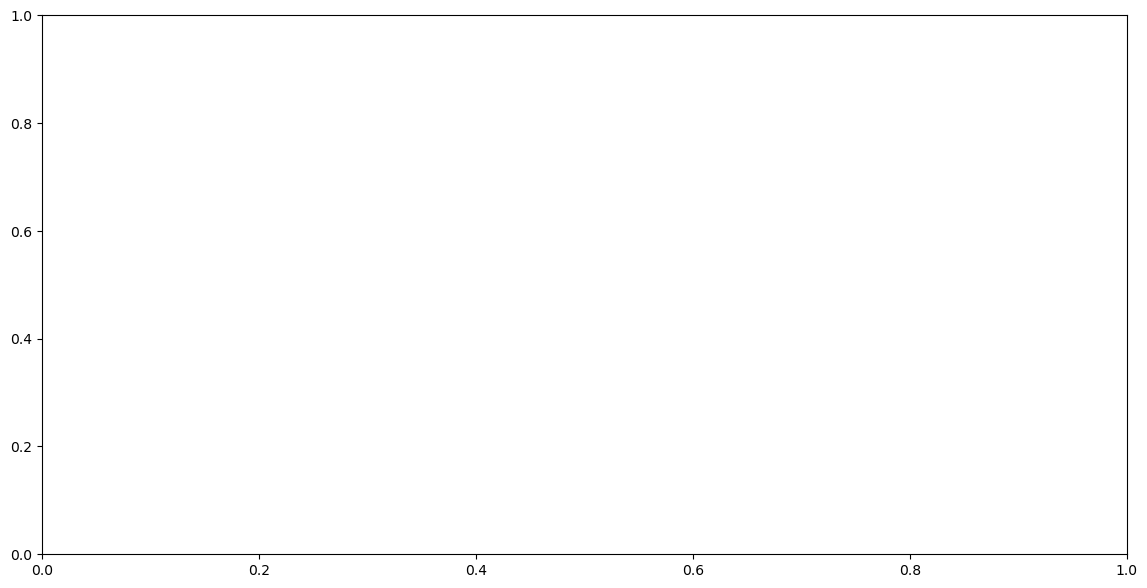

In [13]:
# Create a figure and a single subplot for the scatter plot
fig, ax1 = plt.subplots(figsize=(14, 7))


In [14]:
# Define colors and other parameters for the scatter plot
colors = ['blue', 'green', 'red', 'purple', 'orange']
point_size = 50
transparency = 0.8
border_width = 0.8
border_color = 'black'

# Scatter plot for Total Rentals
for (borough, color) in zip(melted_inventory['Borough'].unique(), colors):
    ax1.scatter(melted_inventory[melted_inventory['Borough'] == borough]['Year'], 
                melted_inventory[melted_inventory['Borough'] == borough]['Total Rentals'], 
                s=point_size, c=color, alpha=transparency, linewidths=border_width, edgecolors=border_color, label=f"{borough} Total Rentals")


In [15]:
# Set the y1 axis to a logarithmic scale for Total Rentals
ax1.set_yscale('log')
ax1.set_ylim(50, 1100000)  # Adjust the limits if necessary


(50, 1100000)

In [16]:
# Create the secondary y-axis for the Median Rent
ax2 = ax1.twinx()


In [17]:
# Scatter plot for Median Rent
for (borough, color) in zip(melted_rent['Borough'].unique(), colors):
    ax2.scatter(melted_rent[melted_rent['Borough'] == borough]['Year'], 
                melted_rent[melted_rent['Borough'] == borough]['Median Rent'], 
                s=point_size, c=color, marker='x', alpha=transparency, linewidths=border_width, label=f"{borough} Median Rent")


In [18]:
# Set labels and titles
ax2.set_ylabel('Median Rent', color='orange')  # Set label for the y2 axis
ax1.set_title('Total Rentals and Median Rent Comparison')


Text(0.5, 1.0, 'Total Rentals and Median Rent Comparison')

In [19]:
# Optional: Create a legend or separate legends if you prefer
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')


In [20]:
# Finally, show the plot
plt.show()